<a href="https://colab.research.google.com/github/julianafalves/Sinais-Digitais/blob/main/Projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
!pip install scikit_dsp_comm

     |████████████████████████████████| 90 kB 3.5 MB/s 


In [133]:
import sk_dsp_comm.sigsys as ss
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *

In [2]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
%config InlineBackend.figure_formats=['png'] # default for inline viewing
#config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

## Acyclic convolution in matlab

In [ ]:
# Convolução acíclica
np.convolve([1,2], [3,4])

array([ 3, 10,  8])

In [ ]:
np.convolve([1,2], [3,4], mode='same')

array([ 3, 10])

In [ ]:
np.convolve([1,2], [3,4,0], mode='same')

array([ 3, 10,  8])

## Acyclic FFT convolution in matlab

In [4]:
def nextpow2(x):
    return 1 if x == 0 else (x - 1).bit_length()

In [ ]:
x = [1, 2, 3, 4]
h = [1, 1, 1]

nx = len(x)
nh = len(h)
nfft = 2**nextpow2(nx+nh-1)
xzp = x + [0] * (nfft-nx)
hzp = h + [0] * (nfft-nh)
X = np.fft.fft(xzp)
H = np.fft.fft(hzp)

In [ ]:
print('X:')
print(X)

print('H:')
print(H)

X:
[10.        +0.j         -0.41421356-7.24264069j -2.        +2.j
  2.41421356-1.24264069j -2.        +0.j          2.41421356+1.24264069j
 -2.        -2.j         -0.41421356+7.24264069j]
H:
[3.        +0.j         1.70710678-1.70710678j 0.        -1.j
 0.29289322+0.29289322j 1.        +0.j         0.29289322-0.29289322j
 0.        +1.j         1.70710678+1.70710678j]


In [ ]:
y = np.real(np.fft.ifft(Y))
yt = y[:nx+nh-1]
yc = np.convolve(x,h)

In [ ]:
print(yt)
print(yc)

[1. 3. 6. 9. 7. 4.]
[1 3 6 9 7 4]


## Example 1: Low-pass filtering by fft convolution

In [109]:
# Frequências do sinal
frequencias = [440, 880, 1000, 2000]
# Tamanho do sinal
tam_sinal = 256
# Taxa de amostragem
taxa_amostragem = 5000

x = np.zeros(tam_sinal)
n = np.arange(0, tam_sinal)

for f in frequencias:
  x += np.sin(2.0 * np.pi * n * f / taxa_amostragem)

<StemContainer object of 3 artists>

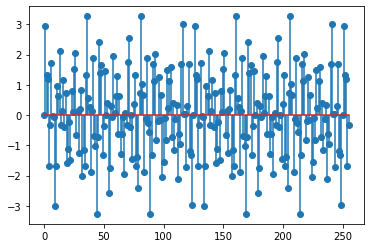

In [110]:
stem(x, use_line_collection=True)

<StemContainer object of 3 artists>

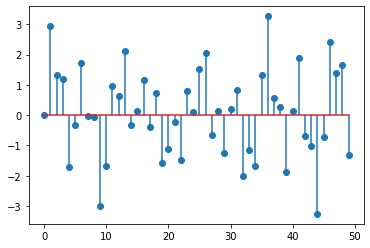

In [6]:
stem(x[:50], use_line_collection=True)

In [115]:
# Tamanho do filtro
tam_filtro = 257
# Frequência de corte
freq_corte = 600

hsupp = np.arange(-(tam_filtro - 1) / 2, 1 + (tam_filtro - 1) / 2)
hideal = (2.0 * freq_corte / taxa_amostragem) * np.sinc(2.0 * freq_corte * hsupp / taxa_amostragem)
h = np.hamming(tam_filtro) * hideal

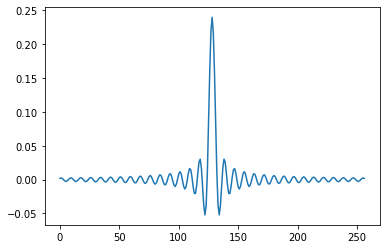

In [116]:
plt.plot(hideal)

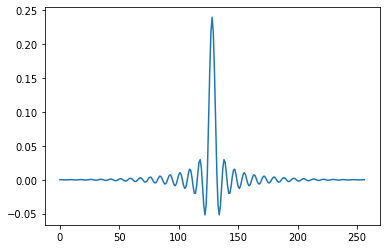

In [117]:
plt.plot(h)

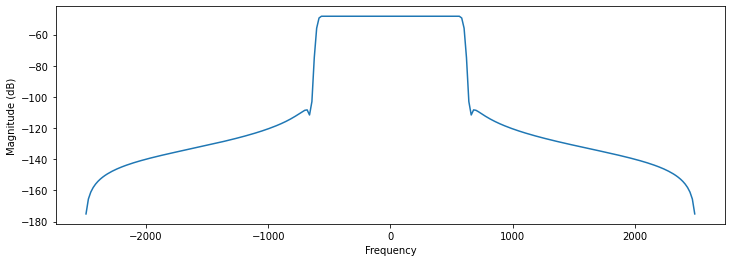

In [119]:
# tá errado acho
plt.figure(figsize=(12,4))

spec, freqs, _ = plt.magnitude_spectrum(h, Fs, window=mlab.window_none, sides='twosided', scale='dB')
# _ = plt.plot(sample_freq, h)

In [88]:
Nfft = 2**nextpow2(L+M-1)

xzp = np.pad(x, (0, Nfft-M))
hzp = np.pad(h, (0, Nfft-L))

X = fftpack.fft(xzp)
H = fftpack.fft(hzp)

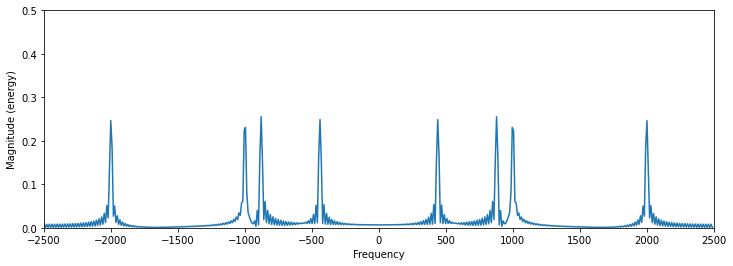

In [76]:
plt.figure(figsize=(12,4))
_ = plt.magnitude_spectrum(xzp, Fs, window=mlab.window_none, sides='twosided')
plt.ylim((0,0.5))
plt.xlim((-2500, 2500))
_ = plt.xticks(np.arange(-2500, 2501, 500))

In [78]:
Y = X * H

In [89]:
intervalo_frequencias = fftpack.fftfreq(xzp.size, d=1/Fs)

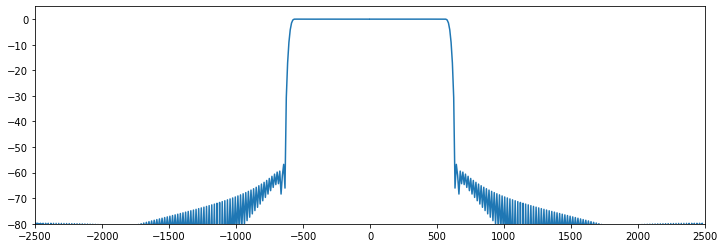

In [131]:
plt.figure(figsize=(12,4))
_ = plt.plot(intervalo_frequencias, 10*np.log10(np.abs(H)**2))
# plt.ylim((0,1.1*np.max(np.abs(Y))**2))
plt.ylim(-80, 5)
plt.xlim((-2500, 2500))
_ = plt.xticks(np.arange(-2500, 2501, 500))

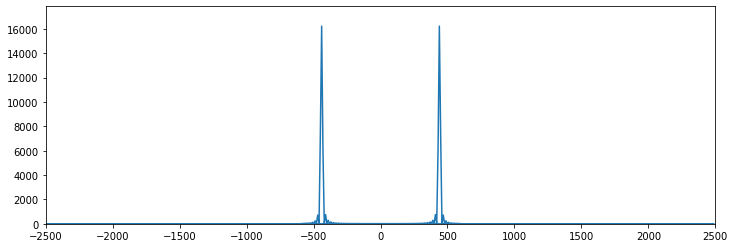

In [98]:
plt.figure(figsize=(12,4))
_ = plt.plot(intervalo_frequencias, np.abs(Y)**2)
plt.ylim((0,1.1*np.max(np.abs(Y))**2))
plt.xlim((-2500, 2500))
_ = plt.xticks(np.arange(-2500, 2501, 500))

In [104]:
y = ifft(Y)
relrmserr = np.linalg.norm(np.imag(y)/np.linalg.norm(y))
y = np.real(y)

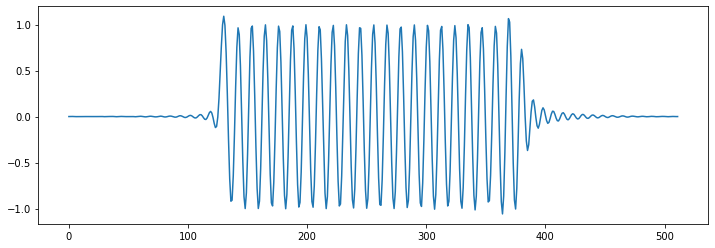

In [106]:
plt.figure(figsize=(12,4))
plt.plot(y)

# Exemplo 2

In [134]:
# Tamanho do sinal
tam_sinal = 100
tam_filtro = 65

n = np.arange(0, tam_sinal)
x = ss.dimpulse(n-10) + ss.dimpulse(n-(tam_sinal-(tam_filtro-1)/4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

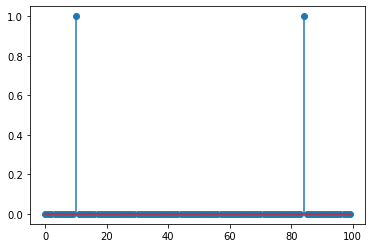

In [135]:
stem(x)

In [144]:
# Frequência de corte
freq_corte = 100
taxa_amostragem = 1000

hsupp = np.arange(-(tam_filtro - 1) / 2, 1 + (tam_filtro - 1) / 2)
hideal = (2.0 * freq_corte / taxa_amostragem) * np.sinc(2.0 * freq_corte * hsupp / taxa_amostragem)
h = np.hamming(tam_filtro) * hideal

(0.0, 100.0)

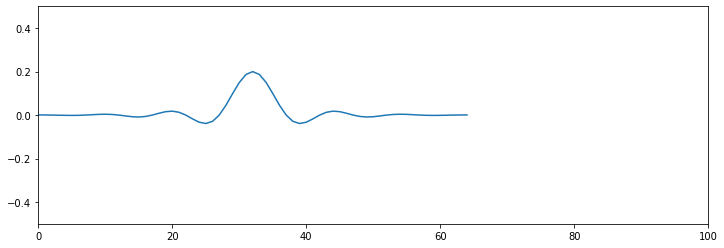

In [145]:
plt.figure(figsize=(12,4))
plt.plot(h)
plt.ylim((-0.5, 0.5))
plt.xlim((0, 100))

(0.0, 160.0)

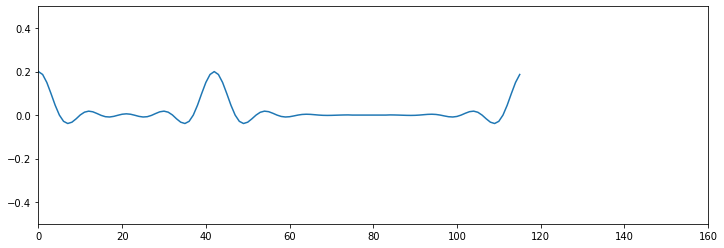

In [162]:
Nfft = tam_sinal + (tam_filtro-1)/4

xzp = np.pad(x, (0, int(Nfft-tam_sinal)))
hzp = np.pad(h, (0, int(Nfft-tam_filtro)))

X = fftpack.fft(xzp)
H = fftpack.fft(hzp)

Y = X * H
y = np.real(fftpack.ifft(Y))

plt.figure(figsize=(12,4))
plt.plot(np.real(y))
plt.ylim((-0.5, 0.5))
plt.xlim((0, 160))

(0.0, 160.0)

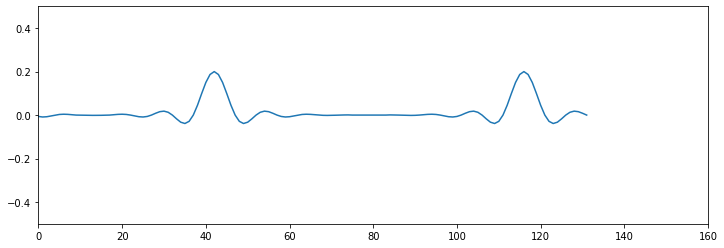

In [163]:
Nfft = tam_sinal + (tam_filtro-1)/2

xzp = np.pad(x, (0, int(Nfft-tam_sinal)))
hzp = np.pad(h, (0, int(Nfft-tam_filtro)))

X = fftpack.fft(xzp)
H = fftpack.fft(hzp)
Y = X * H
y = np.real(fftpack.ifft(Y))

plt.figure(figsize=(12,4))
plt.plot(np.real(y))
plt.ylim((-0.5, 0.5))
plt.xlim((0, 160))

(0.0, 160.0)

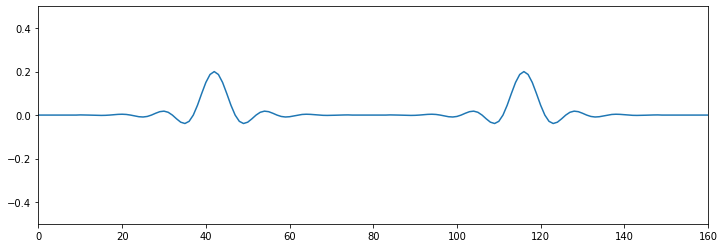

In [169]:
Nfft = tam_sinal + tam_filtro

xzp = np.pad(x, (0, int(Nfft-tam_sinal)))
hzp = np.pad(h, (0, int(Nfft-tam_filtro)))

X = fftpack.fft(xzp)
H = fftpack.fft(hzp)
Y = X * H
y = np.real(fftpack.ifft(Y))

plt.figure(figsize=(12,4))
plt.plot(np.real(y))
plt.ylim((-0.5, 0.5))
plt.xlim((0, 160))